In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [2]:
#read the data and look at it the columns
df = pd.read_csv("loans.csv")
df1 = df.copy()
df.dtypes


Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

In [3]:
#Total_Income col is a series, conver it to float
df['Total_Income'] = df['Total_Income'].str.replace('$', '').astype(float)

In [4]:
for i,j in enumerate(df.columns):
    print(i,j)

0 Unnamed: 0
1 Loan_ID
2 Gender
3 Married
4 Dependents
5 Education
6 Self_Employed
7 ApplicantIncome
8 CoapplicantIncome
9 LoanAmount
10 Loan_Amount_Term
11 Credit_History
12 Property_Area
13 Loan_Status
14 Total_Income


In [5]:
#check for data within columns
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in cols:
    print(df[f'{i}'].value_counts())

Gender
Male      400
Female     91
Name: count, dtype: int64
Married
Yes    322
No     175
Name: count, dtype: int64
Dependents
0     288
1      81
2      79
3+     40
Name: count, dtype: int64
Education
Graduate        393
Not Graduate    107
Name: count, dtype: int64
Self_Employed
No     407
Yes     66
Name: count, dtype: int64
Property_Area
Semiurban    188
Urban        171
Rural        141
Name: count, dtype: int64
Loan_Status
Y    345
N    155
Name: count, dtype: int64


In [6]:
#we will replace columns containing repeating string objects with numbers, which is compliant with the model
df.replace({
    'Gender':{'Male':1,'Female':0},
    'Married':{'Yes':1,'No':0},
    'Dependents':{'3+':3},
    'Education':{'Graduate':1,'Not Graduate':0},
    'Self_Employed':{'Yes':1,'No':0},
    'Property_Area':{'Urban':1,'Semiurban':2,'Rural':3},
    'Loan_Status':{'Y':1,'N':0}
},inplace=True)

In [7]:
df.dtypes
#no more object series in the dataframe, apart from Dependents

Unnamed: 0             int64
Loan_ID               object
Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
Total_Income         float64
dtype: object

In [8]:
df['Dependents'].value_counts()
df['Dependents'] = df['Dependents'].astype(float)

In [9]:
df['Dependents'].value_counts()
df.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
Total_Income         float64
dtype: object

In [10]:
#check for null values
df.isnull().sum()


Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [11]:
#we will fill the Loan_Amount_Term with it's mean and drop all na values
df['Loan_Amount_Term'].describe()
df['Loan_Amount_Term'].fillna(342.543210,inplace=True)
df.isnull().sum()
df.dropna(inplace=True)
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0,6091.0
2,2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1,3000.0
3,3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1,4941.0
4,4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1,6000.0
5,5,LP001011,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1,1,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,LP002585,1.0,1.0,0.0,1,0.0,3597,2157.0,119.0,360.0,0.0,3,0,5754.0
495,495,LP002586,0.0,1.0,1.0,1,0.0,3326,913.0,105.0,84.0,1.0,2,1,4239.0
496,496,LP002587,1.0,1.0,0.0,0,0.0,2600,1700.0,107.0,360.0,1.0,3,1,4300.0
498,498,LP002600,1.0,1.0,1.0,1,1.0,2895,0.0,95.0,360.0,1.0,2,1,2895.0


In [12]:
#we are now left with 402 observations, from 500 intially
# assign features and labels to different dataframes and drop unnecessary columns
X = df.drop(['Unnamed: 0','Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']
y

1      0
2      1
3      1
4      1
5      1
      ..
494    0
495    1
496    1
498    1
499    0
Name: Loan_Status, Length: 402, dtype: int64

In [13]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,6091.0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,3000.0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,4941.0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,6000.0
5,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...
494,1.0,1.0,0.0,1,0.0,3597,2157.0,119.0,360.0,0.0,3,5754.0
495,0.0,1.0,1.0,1,0.0,3326,913.0,105.0,84.0,1.0,2,4239.0
496,1.0,1.0,0.0,0,0.0,2600,1700.0,107.0,360.0,1.0,3,4300.0
498,1.0,1.0,1.0,1,1.0,2895,0.0,95.0,360.0,1.0,2,2895.0


In [14]:
#splitting into training and testing(25%) sets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
print(X.shape,x_train.shape,y_train.shape,y_test.shape)

(402, 12) (301, 12) (301,) (101,)


In [16]:
#build the neural network model
tf.random.set_seed(123)
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(12,)), #the input layer
    keras.layers.Dense(20,activation='relu'), #hidden layer with 20 neurons and act. function as recitified linear unit
    keras.layers.Dense(1,activation='sigmoid') #output layer with 2 neurons for 2 classes of output(1 and 0)
])

Metal device set to: Apple M1


In [17]:
#compile the model

model1.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [18]:
#training the model

history1 = model1.fit(x_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100


2023-05-01 15:50:11.809604: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8/8 [==============================] - 1s 41ms/step - loss: 387.8853 - accuracy: 0.6833 - val_loss: 246.2999 - val_accuracy: 0.6230
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 261.0621 - accuracy: 0.6833 - val_loss: 138.7367 - val_accuracy: 0.6230
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 120.7705 - accuracy: 0.6792 - val_loss: 44.6098 - val_accuracy: 0.6393
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 71.6561 - accuracy: 0.4958 - val_loss: 73.3476 - val_accuracy: 0.4262
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 60.6074 - accuracy: 0.4208 - val_loss: 24.2242 - val_accuracy: 0.5246
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 44.9235 - accuracy: 0.6083 - val_loss: 22.7961 - val_accuracy: 0.6557
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 35.9604 - accuracy: 0.5458 - val_loss: 19.8539 - val_accuracy: 0.4754
Epoch 8/100
8

8/8 [==============================] - 0s 9ms/step - loss: 2.1354 - accuracy: 0.5708 - val_loss: 2.4313 - val_accuracy: 0.6066
Epoch 60/100
8/8 [==============================] - 0s 9ms/step - loss: 2.0340 - accuracy: 0.6000 - val_loss: 3.5448 - val_accuracy: 0.4262
Epoch 61/100
8/8 [==============================] - 0s 9ms/step - loss: 4.5446 - accuracy: 0.5083 - val_loss: 2.5756 - val_accuracy: 0.4754
Epoch 62/100
8/8 [==============================] - 0s 10ms/step - loss: 2.0019 - accuracy: 0.5958 - val_loss: 2.4674 - val_accuracy: 0.5738
Epoch 63/100
8/8 [==============================] - 0s 12ms/step - loss: 3.1807 - accuracy: 0.5958 - val_loss: 5.6118 - val_accuracy: 0.6230
Epoch 64/100
8/8 [==============================] - 0s 10ms/step - loss: 4.2295 - accuracy: 0.5542 - val_loss: 4.3914 - val_accuracy: 0.6230
Epoch 65/100
8/8 [==============================] - 0s 9ms/step - loss: 3.3041 - accuracy: 0.5917 - val_loss: 5.0784 - val_accuracy: 0.5902
Epoch 66/100
8/8 [============

In [19]:
#standardize the data
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [20]:
history1_std = model1.fit(x_train_std,y_train,validation_split=0.2,epochs=100) #fitting the model on standardized data

Epoch 1/100
8/8 [==============================] - 0s 38ms/step - loss: 0.6317 - accuracy: 0.6875 - val_loss: 0.6467 - val_accuracy: 0.6557
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6026 - accuracy: 0.7333 - val_loss: 0.6369 - val_accuracy: 0.6557
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5786 - accuracy: 0.7625 - val_loss: 0.6258 - val_accuracy: 0.7377
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5603 - accuracy: 0.7833 - val_loss: 0.6173 - val_accuracy: 0.7705
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.5445 - accuracy: 0.7917 - val_loss: 0.6117 - val_accuracy: 0.7541
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5328 - accuracy: 0.7958 - val_loss: 0.6075 - val_accuracy: 0.7705
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.5236 - accuracy: 0.8042 - val_loss: 0.6039 - val_accuracy: 0.7869
Epoch 8/100
8/8 [===

8/8 [==============================] - 0s 12ms/step - loss: 0.4237 - accuracy: 0.8167 - val_loss: 0.5224 - val_accuracy: 0.8033
Epoch 60/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4233 - accuracy: 0.8167 - val_loss: 0.5216 - val_accuracy: 0.8033
Epoch 61/100
8/8 [==============================] - 0s 12ms/step - loss: 0.4227 - accuracy: 0.8167 - val_loss: 0.5203 - val_accuracy: 0.8033
Epoch 62/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4222 - accuracy: 0.8167 - val_loss: 0.5194 - val_accuracy: 0.8033
Epoch 63/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4217 - accuracy: 0.8167 - val_loss: 0.5188 - val_accuracy: 0.8033
Epoch 64/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4214 - accuracy: 0.8167 - val_loss: 0.5179 - val_accuracy: 0.8033
Epoch 65/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4208 - accuracy: 0.8167 - val_loss: 0.5170 - val_accuracy: 0.8033
Epoch 66/100
8/8 [==========

In [21]:
#notice the huge improvement on model accuracy with the standarized data 

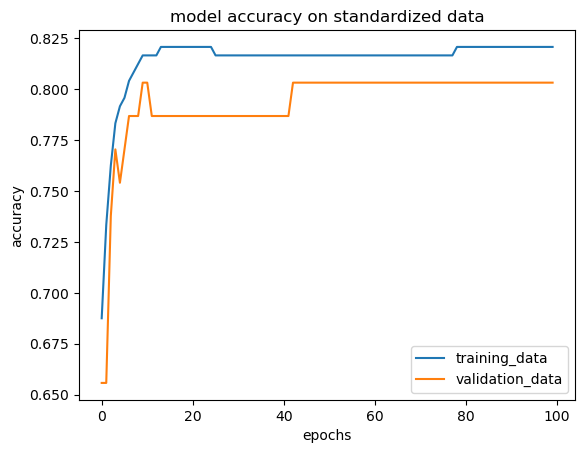

In [23]:
plt.plot(history1_std.history['accuracy'])
plt.plot(history1_std.history['val_accuracy'])

plt.title('model accuracy on standardized data')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['training_data','validation_data'])

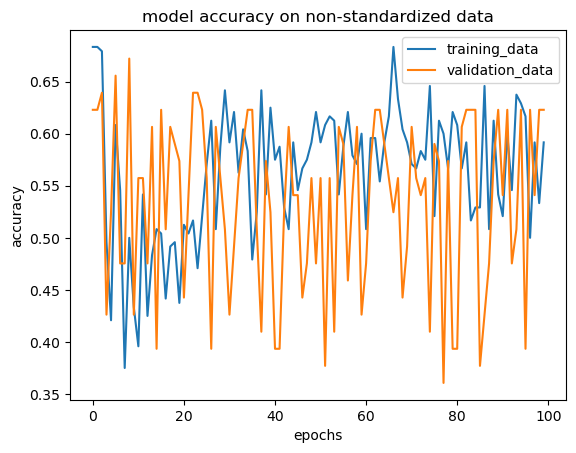

In [24]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

plt.title('model accuracy on non-standardized data')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['training_data','validation_data'])

In [25]:
#getting accuracy based on test data

loss,accuracy = model1.evaluate(x_test_std,y_test)
# x_test_std.shape #101,12
# x_test_std[10]

4/4 [==============================] - 0s 24ms/step - loss: 0.4482 - accuracy: 0.8119


In [26]:
probs = model1.predict(x_test_std)
# probs.shape
# probs[10]

4/4 [==============================] - 0s 6ms/step


In [27]:
y_pred_test = probs >= 0.5
y_pred_test = y_pred_test.flatten()
accuracy_test = np.mean(y_pred_test == y_test)
accuracy_test

0.8118811881188119

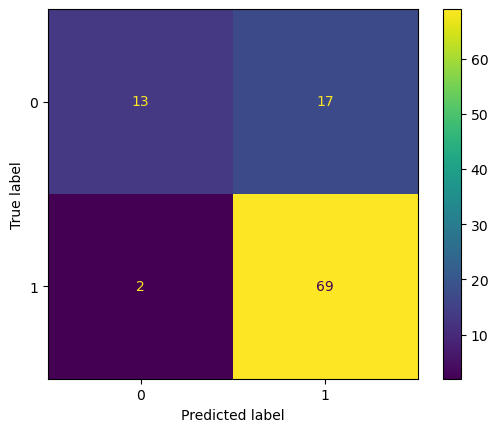

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))
disp.plot()